# Feature selection - feature importance from L1 regularization

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine

# Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target

# Store data in dataframe
dfX = pd.DataFrame(data=X, columns=dataObj.feature_names)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Understand the sparsity

In [2]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', penalty='l1', C=0.1, multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9814814814814815


In [3]:
# Intercept
print(lr.intercept_)

[-0.3838579  -0.15814512 -0.7004594 ]


In [4]:
# Weights
for count, coef in enumerate(lr.coef_):
    coef_print = ", ".join(f"{i:5.2f}" for i in coef)
    print(f"(Model:{count}) Coefs: {coef_print}")

(Model:0) Coefs:  0.28,  0.00,  0.00, -0.03,  0.00,  0.00,  0.71,  0.00,  0.00,  0.00,  0.00,  0.00,  1.24
(Model:1) Coefs: -0.64, -0.07, -0.06,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00, -0.93,  0.06,  0.00, -0.37
(Model:2) Coefs:  0.00,  0.06,  0.00,  0.00,  0.00,  0.00, -0.64,  0.00,  0.00,  0.50, -0.36, -0.57,  0.00


In [5]:
# Calculate weight values for different values of C
cols = dfX.columns
dfW = pd.DataFrame(columns=np.append(['C'], cols))
dfW = dfW.set_index('C')
for c in np.arange(-5., 6.):
    C = 10.**c
    lr = LogisticRegression(solver='liblinear', penalty='l1', C=C, random_state=0, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    coef_norm = np.linalg.norm(lr.coef_ , ord=1, axis=0) #Calculate norm of order 1 (sum of absolute) across different models
    dfW.loc[C] =  coef_norm
    
display(dfW)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
C,,,,,,,,,,,,,
0.00001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.10000,0.924346,0.130317,0.057217,0.027967,0.000000,0.000000,1.345577,0.000000,0.000000,1.424282,0.418729,0.571803,1.607267
1.00000,2.215363,1.004368,1.949931,1.714581,0.000000,0.000000,3.055109,0.040012,0.494097,4.453711,1.671262,1.862348,4.234841
10.00000,5.316736,2.714424,5.359445,4.670552,0.000000,0.000000,8.030011,1.854167,1.518138,12.084680,3.032699,3.561949,9.543210
100.00000,9.837816,4.628311,9.178005,7.920113,0.380535,0.000000,14.707565,3.927095,2.769849,22.402952,5.795610,5.553408,17.263865
1000.00000,14.030214,5.822233,12.523791,9.603715,1.060073,0.090951,19.017796,6.371761,4.328401,30.982597,10.203259,7.932224,24.416917


### Plot the results
- Installing seaborn package

```python conda install -c anaconda seaborn ```

- Alternatively
```python 
colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)] ```

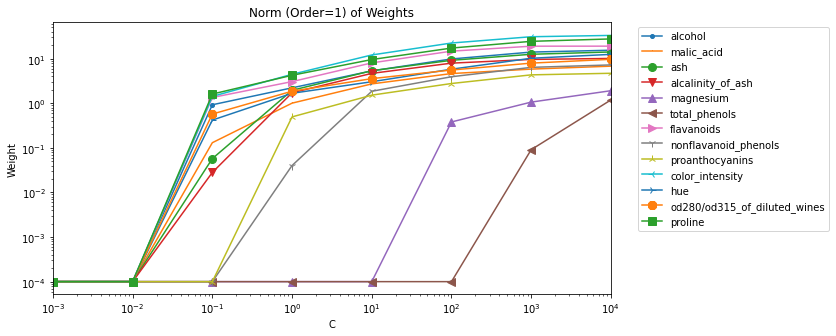

In [6]:
import seaborn as sns
cols = dfW.columns.values
colors = sns.color_palette(n_colors=len(cols))
markers=['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
markers = markers[:len(cols)]

#Define a small value to make value non-zero for log plot
epsilon = 1e-4

fig, ax = plt.subplots(figsize=(10,5))
for col, color, marker in zip(cols,colors,markers):
    ax.plot(dfW[col] + epsilon,label=col,color=color,marker=marker,markersize=8)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlim([10.**-3, 10.**4])
ax.set_title('Norm (Order=1) of Weights')
ax.set_xlabel('C')
ax.set_ylabel('Weight')
plt.show()

In [7]:
# Choose the columns based on norm of weights
lr = LogisticRegression(solver="liblinear", penalty="l1", C=0.1, multi_class="ovr")
lr.fit(X_train_std, y_train)
print("Training accuracy:", lr.score(X_train_std, y_train))
print("Test accuracy:", lr.score(X_test_std, y_test))
coefs = np.linalg.norm(lr.coef_ , ord=1, axis=0)
idxs = np.argsort(np.abs(coefs))[::-1]
for count, idx in enumerate(idxs[:]):
    coef = coefs[idx]
    col = cols[idx]
    print(f"({count+1:2d}), Norm of Coefs: {coef:6.3f}, Name: {col.title():20s}")

Training accuracy: 0.9838709677419355
Test accuracy: 0.9814814814814815
( 1), Norm of Coefs:  1.607, Name: Proline             
( 2), Norm of Coefs:  1.425, Name: Color_Intensity     
( 3), Norm of Coefs:  1.346, Name: Flavanoids          
( 4), Norm of Coefs:  0.924, Name: Alcohol             
( 5), Norm of Coefs:  0.571, Name: Od280/Od315_Of_Diluted_Wines
( 6), Norm of Coefs:  0.418, Name: Hue                 
( 7), Norm of Coefs:  0.130, Name: Malic_Acid          
( 8), Norm of Coefs:  0.057, Name: Ash                 
( 9), Norm of Coefs:  0.028, Name: Alcalinity_Of_Ash   
(10), Norm of Coefs:  0.000, Name: Proanthocyanins     


## SKL Implementation

Let use SKL method to choose columns with norm of weights larger than 0.5

In [8]:
from sklearn.feature_selection import SelectFromModel

# Create selector object
threshold = 0.5 # default value is 1e-5 for L1
sel = SelectFromModel(estimator=lr, norm_order=1, threshold=threshold)
#sel = SelectFromModel(estimator=lr, norm_order=1, max_features=5)

# Training
sel.fit(X_train_std, y_train)

# Extract norm of weights
coef = sel.estimator_.coef_ #Not sel.estimator (without _)
coef_norm = np.linalg.norm(coef , ord=1, axis=0)

# Get column boolean
sup = sel.get_support()
print('\nSupport array')
print('-'*30)
print(*sup, sep=', ')


Support array
------------------------------
True, False, False, False, False, False, True, False, False, True, False, True, True


In [9]:
# Sort array from based on weights from large to small
cols = dfX.columns
idxs = np.argsort(coef_norm)[::-1]
sup = sup[idxs]
coef_norm = coef_norm[idxs]
cols = cols[idxs]

# Print results
for count, (col, coef) in enumerate(zip(cols, coef_norm)):
    print(f"{count+1:2d}) {col:30s} \t{coef:5.3f}")

 1) proline                        	1.607
 2) color_intensity                	1.424
 3) flavanoids                     	1.346
 4) alcohol                        	0.924
 5) od280/od315_of_diluted_wines   	0.572
 6) hue                            	0.419
 7) malic_acid                     	0.130
 8) ash                            	0.057
 9) alcalinity_of_ash              	0.028
10) proanthocyanins                	0.000
11) nonflavanoid_phenols           	0.000
12) total_phenols                  	0.000
13) magnesium                      	0.000


In [10]:
# Print columns
cols_sel = cols[sup]
print('\nChosen columns')
print('-'*30)
print(*cols_sel, sep=', ')

cols_rem = cols[np.logical_not(sup)]
print(f'\nRemoved columns')
print('-'*30)
print(*cols_rem, sep=', ')


Chosen columns
------------------------------
proline, color_intensity, flavanoids, alcohol, od280/od315_of_diluted_wines

Removed columns
------------------------------
hue, malic_acid, ash, alcalinity_of_ash, proanthocyanins, nonflavanoid_phenols, total_phenols, magnesium


In [11]:
# Transformation (remove column)
X_sel = sel.transform(X)

# Show data
dfX_sel = pd.DataFrame(data=X_sel, columns=cols_sel)
display(dfX_sel)

,proline,color_intensity,flavanoids,alcohol,od280/od315_of_diluted_wines
0,14.23,3.06,5.64,3.92,1065.0
1,13.20,2.76,4.38,3.40,1050.0
2,13.16,3.24,5.68,3.17,1185.0
3,14.37,3.49,7.80,3.45,1480.0
4,13.24,2.69,4.32,2.93,735.0
...,...,...,...,...,...
173,13.71,0.61,7.70,1.74,740.0
174,13.40,0.75,7.30,1.56,750.0
175,13.27,0.69,10.20,1.56,835.0
176,13.17,0.68,9.30,1.62,840.0
